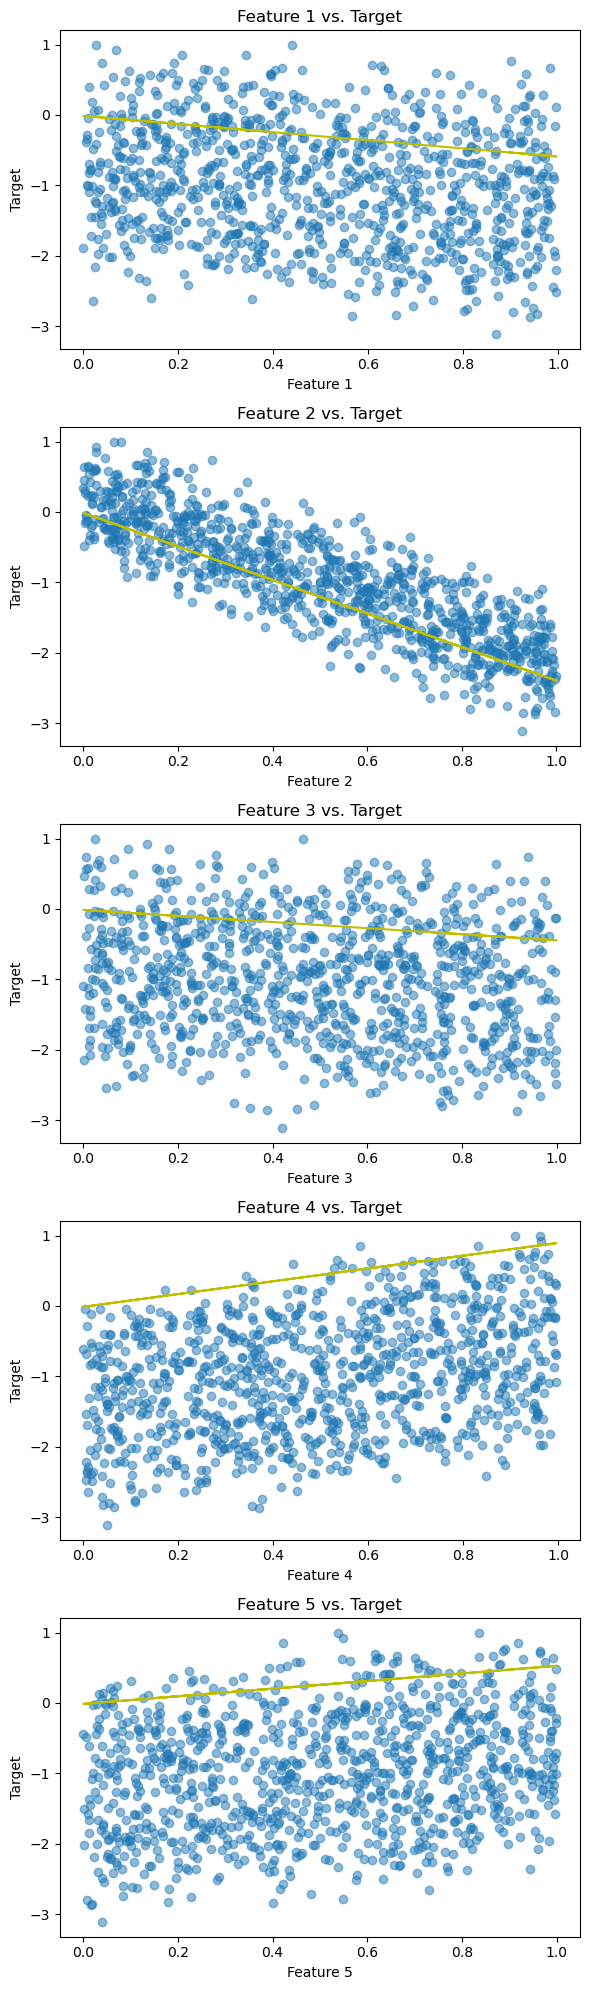

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate the dataset
num_samples = 1000
num_features = 5

# Generate feature matrix X with random values
X = np.random.rand(num_samples, num_features)

# Generate target variable y as a linear combination of features with some noise
true_weights = np.random.randn(num_features)
noise = 0.2 * np.random.randn(num_samples)  # Add some random noise
y = np.dot(X, true_weights) + noise

# Add a column of ones to X for the intercept term
X = np.concatenate((np.ones((num_samples, 1)), X), axis=1)

# Calculate the best fit weights using the normal equation
weights = np.linalg.inv(X.T @ X) @ X.T @ y

# Plot the target column against each feature column
fig, axs = plt.subplots(num_features, figsize=(6, 4*num_features))

for i in range(num_features):
    feature_name = f'Feature {i+1}'
    axs[i].scatter(X[:, i+1], y, alpha=0.5)
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Target')
    axs[i].set_title(f'{feature_name} vs. Target')

    # Calculate the best fit line using the weights
    best_fit_line = weights[i+1] * X[:, i+1] + weights[0]
    axs[i].plot(X[:, i+1], best_fit_line, color='y')

plt.tight_layout()
plt.show()


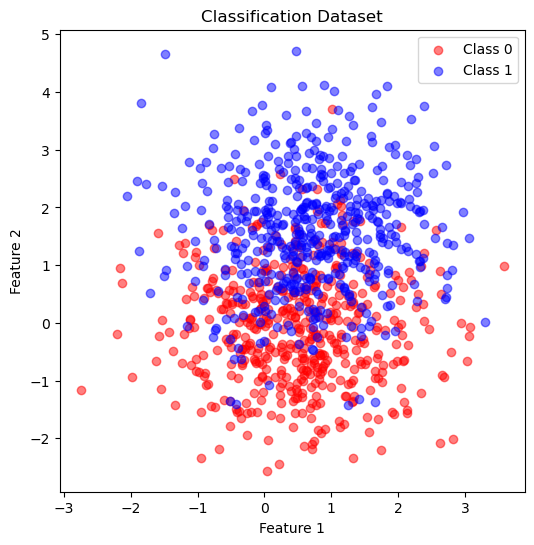

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Generate the dataset
num_samples = 1000
num_features = 2
num_classes = 2
num_clusters = 2

centers = np.random.randn(num_classes, num_features)
X, y = make_blobs(n_samples=num_samples, centers=centers, cluster_std=1.0, random_state=42)

# Plot the data
plt.figure(figsize=(6, 6))
colors = ['r', 'b']

for class_label in range(num_classes):
    class_indices = np.where(y == class_label)
    plt.scatter(X[class_indices, 0], X[class_indices, 1], c=colors[class_label], alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')
plt.legend(['Class 0', 'Class 1'])
plt.show()


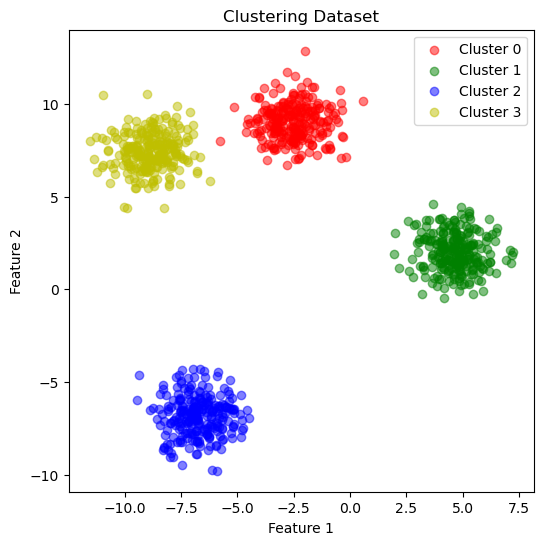

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Generate the dataset
num_samples = 1000
num_features = 2
num_clusters = 4

X, y = make_blobs(n_samples=num_samples, n_features=num_features, centers=num_clusters, random_state=42)

# Plot the data
plt.figure(figsize=(6, 6))
colors = ['r', 'g', 'b', 'y']

for cluster_label in range(num_clusters):
    cluster_indices = np.where(y == cluster_label)
    plt.scatter(X[cluster_indices, 0], X[cluster_indices, 1], c=colors[cluster_label], alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()


In [13]:
import requests as req
url = 'https://www.worldometers.info/coronavirus/'
page = req.get(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'html.parser')
table1 = soup.find('table', id='main_table_countries_today')
     


In [14]:
headers = []
for i in table1.find_all('th'):
 title = i.text
 headers.append(title)
headers
     

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [15]:
import pandas as pd
mydata = pd.DataFrame(columns = headers)
for j in table1.find_all('tr', )[2:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row
     


In [16]:
columns=['Country,Other','Continent','Population','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases']
mydata=mydata[columns]
mydata.head()
     

,"Country,Other",Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,\nAsia\n,Asia,,"217,326,615","+25,601","1,546,342",+51,"201,043,014","+23,067","14,737,259"
1,\nEurope\n,Europe,,"249,271,308","+18,197","2,059,840",+188,"245,231,793","+32,082","1,979,675"
2,\nSouth America\n,South America,,"68,674,162",,"1,355,584",,"66,460,570",+47,"858,008"
3,\nOceania\n,Australia/Oceania,,"14,323,648",,"27,858",,"14,150,432",,"145,358"
4,\nAfrica\n,Africa,,"12,823,265",,"258,762",,"12,085,254",,"479,249"


In [17]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.95], flip_y=0)
import numpy as np
print(np.unique(y,return_counts=True))

(array([0, 1]), array([950,  50], dtype=int64))


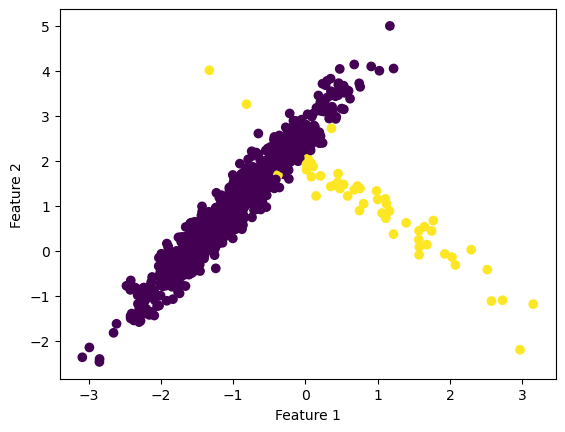

In [18]:

import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [19]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=0.2638)
X, y = over.fit_resample(X, y)
print(np.unique(y,return_counts=True))

(array([0, 1]), array([950, 250], dtype=int64))


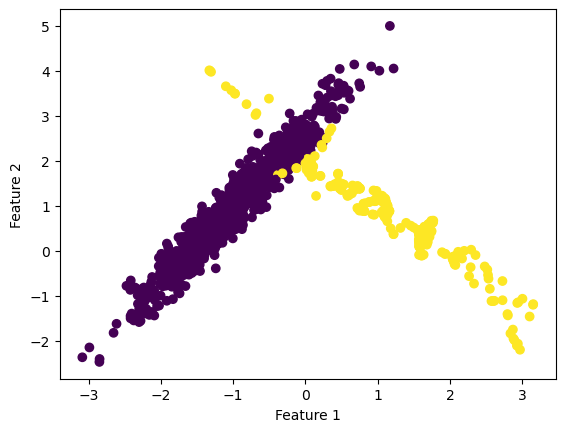

In [20]:
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [21]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=0.3333)
X, y = under.fit_resample(X, y)
print(np.unique(y,return_counts=True))
     

(array([0, 1]), array([750, 250], dtype=int64))


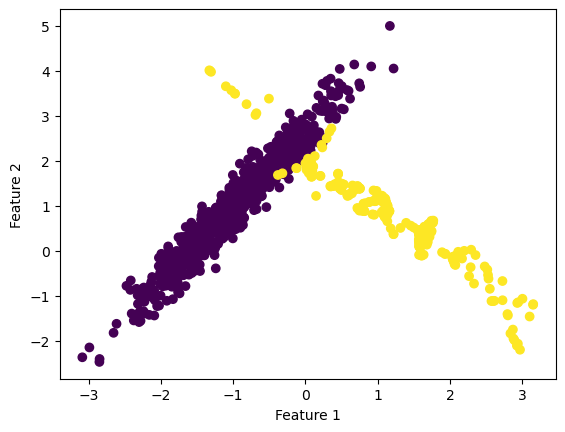

In [22]:
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [23]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
print("First 5 rows of the DataFrame:")
print(df.head())

print("Missing values in the DataFrame:")
print(df.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set dimensions:", X_train.shape)
print("Testing set dimensions:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_train_scaled = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
print("First 5 rows of the standardized training set:")
print(df_train_scaled.head())

     

First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Missing values in the DataFrame:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Training set dimensions: (105, 4)
Testing set dimensions: (45, 4)
First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.21